In [60]:
import numpy as np
import pandas as pd
import re

In [61]:
df1 = pd.read_csv('train.csv')

In [62]:
df2 = pd.read_csv('test.csv')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [64]:
#The important step here is to concatenate the train and test sets
df3 = pd.concat([df1, df2], axis=0)

In [65]:
df3=df3.drop(columns=["ID","Customer_ID","Name","SSN"],axis=1)

In [66]:
dummies = pd.get_dummies(df3[["Num_Bank_Accounts","Num_Credit_Card","Delay_from_due_date","Credit_Utilization_Ratio"]],drop_first=True)

In [67]:
numerical_df = df3.select_dtypes(include=['int64', 'float64'])

In [68]:
finaldf=pd.concat([numerical_df,dummies,df3["Credit_Score"]],axis=1)
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Monthly_Inhand_Salary     127500 non-null  float64
 1   Num_Bank_Accounts         150000 non-null  int64  
 2   Num_Credit_Card           150000 non-null  int64  
 3   Interest_Rate             150000 non-null  int64  
 4   Delay_from_due_date       150000 non-null  int64  
 5   Num_Credit_Inquiries      147000 non-null  float64
 6   Credit_Utilization_Ratio  150000 non-null  float64
 7   Total_EMI_per_month       150000 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Delay_from_due_date       150000 non-null  int64  
 11  Credit_Utilization_Ratio  150000 non-null  float64
 12  Credit_Score              100000 non-null  object 
dtypes: float64(5), int64(7), object(1)
memory usa

In [69]:
score_mapping = {"Good": 750, "Standard": 600, "Poor": 500}

# Create a new column "credit_score_mapped" based on the mapping
finaldf["Credit_Score_mapped"] = finaldf["Credit_Score"].map(score_mapping)
finaldf=finaldf.drop(columns=["Credit_Score"],axis=1)
finaldf=finaldf.fillna(finaldf.median())

In [70]:
Y = finaldf["Credit_Score_mapped"]

X = finaldf.drop(columns=['Credit_Score_mapped'], axis = 1)

In [71]:
# Splitting the data using train and test set:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [72]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['500', '600','750'], yticklabels = ['500', '600','750'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [73]:
def model_performance_classification(model, predictors, target):

    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')

    precision = precision_score(target, pred, average = 'macro')

    acc = accuracy_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [76]:
# Building Decision Tree:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
dt = DecisionTreeClassifier(random_state = 1)

              precision    recall  f1-score   support

       500.0       0.48      0.49      0.49      8692
       600.0       0.77      0.76      0.77     30928
       750.0       0.43      0.45      0.44      5380

    accuracy                           0.67     45000
   macro avg       0.56      0.57      0.57     45000
weighted avg       0.68      0.67      0.67     45000



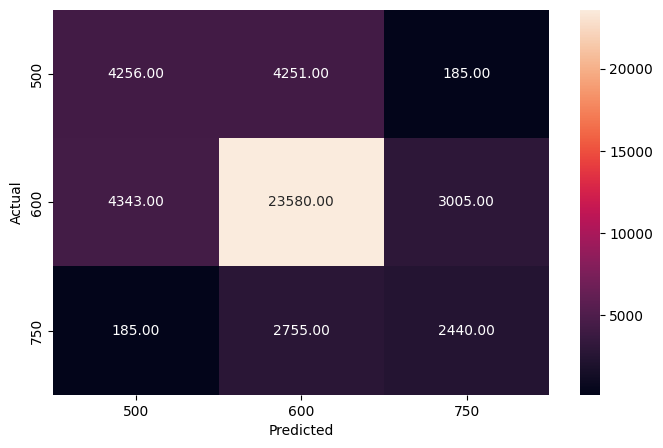

In [77]:
# Checking performance on the test dataset
dt.fit(x_train,y_train)
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [78]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.56295,0.568531,0.6728


In [79]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

importance_df

,Importance
Credit_Utilization_Ratio,0.151762
Credit_Utilization_Ratio,0.149286
Interest_Rate,0.131828
Total_EMI_per_month,0.118975
Monthly_Inhand_Salary,0.115126
Num_Credit_Inquiries,0.076238
Delay_from_due_date,0.071834
Delay_from_due_date,0.063246
Num_Credit_Card,0.037889
Num_Credit_Card,0.029870


In [84]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {500.0: 1, 600.0: 1, 750.0: 1}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={500.0: 1, 600.0: 1, 750.0: 1},
                       random_state=1)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00     20306
       600.0       1.00      1.00      1.00     72246
       750.0       1.00      1.00      1.00     12448

    accuracy                           1.00    105000
   macro avg       1.00      1.00      1.00    105000
weighted avg       1.00      1.00      1.00    105000



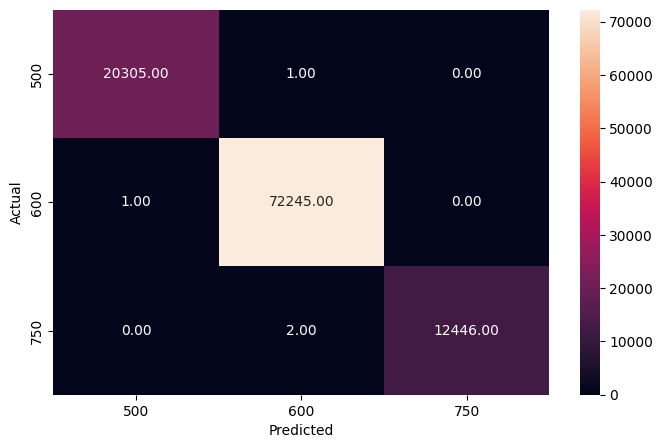

In [85]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

       500.0       0.59      0.43      0.50      8692
       600.0       0.76      0.87      0.81     30928
       750.0       0.57      0.36      0.44      5380

    accuracy                           0.72     45000
   macro avg       0.64      0.55      0.59     45000
weighted avg       0.71      0.72      0.71     45000



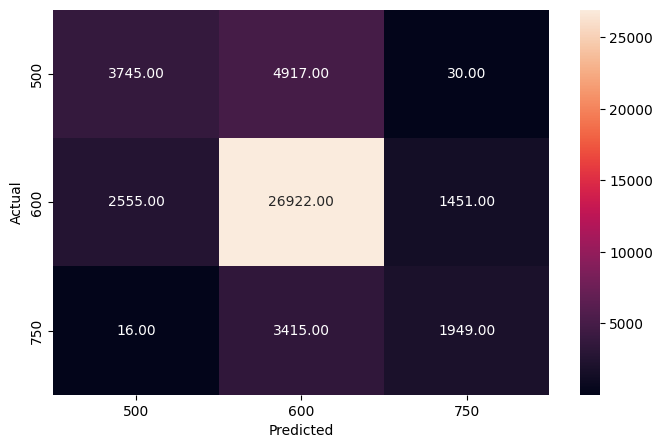

In [86]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [87]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.641606,0.554532,0.7248


In [88]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df

,Importance
Credit_Utilization_Ratio,0.140192
Credit_Utilization_Ratio,0.140147
Interest_Rate,0.112819
Monthly_Inhand_Salary,0.105376
Total_EMI_per_month,0.103921
Num_Credit_Inquiries,0.081300
Delay_from_due_date,0.079707
Delay_from_due_date,0.075405
Num_Credit_Card,0.042541
Num_Credit_Card,0.040855


<Figure size 1300x1300 with 0 Axes>